In [1]:
import pandas as pd
from prettytable import PrettyTable

In [2]:
data_covid19 = pd.read_csv('/home/hadoop/dataset/caso_covid_brazil.csv');

In [8]:
data_covid19_amazonas = data_covid19[data_covid19.state.isin(['AM'])] # Filtra só no Amazonas
data_covid19_am_manaus = data_covid19[data_covid19.city.isin(['Manaus'])] # Filtra só de Manaus

# verifica valores nulos por coluna
pd.DataFrame({'tipos':data_covid19_am_manaus.dtypes, 'missing':data_covid19_am_manaus.isna().sum()}) 

In [9]:
data_covid19_am_manaus

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
15639,2020-11-16,AM,Manaus,city,66767,2989,239,True,2182763.0,2219580.0,1302603.0,3008.09162,0.0448
15640,2020-11-15,AM,Manaus,city,66724,2987,238,False,2182763.0,2219580.0,1302603.0,3006.15432,0.0448
15641,2020-11-13,AM,Manaus,city,66292,2974,237,False,2182763.0,2219580.0,1302603.0,2986.69118,0.0449
15642,2020-11-12,AM,Manaus,city,66122,2973,236,False,2182763.0,2219580.0,1302603.0,2979.03207,0.0450
15643,2020-11-11,AM,Manaus,city,65886,2952,235,False,2182763.0,2219580.0,1302603.0,2968.39943,0.0448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15873,2020-03-21,AM,Manaus,city,11,0,5,False,2182763.0,2219580.0,1302603.0,0.49559,0.0000
15874,2020-03-20,AM,Manaus,city,7,0,4,False,2182763.0,2219580.0,1302603.0,0.31537,0.0000
15875,2020-03-19,AM,Manaus,city,3,0,3,False,2182763.0,2219580.0,1302603.0,0.13516,0.0000
15876,2020-03-18,AM,Manaus,city,2,0,2,False,2182763.0,2219580.0,1302603.0,0.09011,0.0000


In [11]:
# criei dataframe com as duas informações que vou trabalhar
covid19_manaus = data_covid19_am_manaus[['date','confirmed','deaths', 'death_rate']] 
# covid19_manaus.count() # Mostra quantidade de registros por coluna
# covid19_manaus.size # Tamanho do dataset
covid19_manaus

,date,confirmed,deaths,death_rate
15639,2020-11-16,66767,2989,0.0448
15640,2020-11-15,66724,2987,0.0448
15641,2020-11-13,66292,2974,0.0449
15642,2020-11-12,66122,2973,0.0450
15643,2020-11-11,65886,2952,0.0448
...,...,...,...,...
15873,2020-03-21,11,0,0.0000
15874,2020-03-20,7,0,0.0000
15875,2020-03-19,3,0,0.0000
15876,2020-03-18,2,0,0.0000


<h3> 1 - Medidas de Tendência Central (Média, Mediana e Moda)</h3>

<h4> I - Casos confirmados</h4>

In [14]:
print('Média: ',covid19_manaus['confirmed'].mean())
print('Mediana: ',covid19_manaus['confirmed'].median())
print('Moda: ',covid19_manaus['confirmed'].mode())

Média:  29771.10878661088
Mediana:  31053.0
Moda:  0    2
dtype: int64


<h4> II - Casos mortes</h4>

In [15]:
print('Média: ',covid19_manaus['deaths'].mean())
print('Mediana: ',covid19_manaus['deaths'].median())
print('Moda: ',covid19_manaus['deaths'].mode())

Média:  1646.305439330544
Mediana:  1914.0
Moda:  0    0
dtype: int64


<h3>1.1 - Escore Z</h3>

In [16]:
def situacao_escore_media(valor_escore):
    if valor_escore > 0:
        return ('Acima da Média')
    elif valor_escore < 0:
        return ('Abaixo da Média')
    elif valor_escore == 0:
        return ('Igual a Média')

<h4> I - Casos confirmados</h4>

In [18]:
print('DATE\tCONFIRMED\tESCORE Z')
for index, row in covid19_manaus.iterrows():
    #print(row['year'], row['suicides_no'])    
    escore_z = (row['confirmed'] - covid19_manaus['confirmed'].mean())/covid19_manaus['confirmed'].std()
    print(row['date'],'\t',row['confirmed'],'\t',escore_z,'\t',situacao_escore_media(escore_z))

DATE	CONFIRMED	ESCORE Z
2020-11-16 	 66767 	 1.7892751202307635 	 Acima da Média
2020-11-15 	 66724 	 1.787195461445788 	 Acima da Média
2020-11-13 	 66292 	 1.7663021452804526 	 Acima da Média
2020-11-12 	 66122 	 1.758080238456131 	 Acima da Média
2020-11-11 	 65886 	 1.7466662972176605 	 Acima da Média
2020-11-10 	 65570 	 1.73138322335598 	 Acima da Média
2020-11-09 	 65213 	 1.7141172190249043 	 Acima da Média
2020-11-08 	 65151 	 1.7111186412419166 	 Acima da Média
2020-11-07 	 65015 	 1.704541115782459 	 Acima da Média
2020-11-05 	 64341 	 1.6719436734319129 	 Acima da Média
2020-11-04 	 64092 	 1.6599009981421708 	 Acima da Média
2020-11-03 	 63705 	 1.6411840690773913 	 Acima da Média
2020-11-02 	 63557 	 1.6340261737244524 	 Acima da Média
2020-11-01 	 63504 	 1.6314628733615757 	 Acima da Média
2020-10-31 	 63382 	 1.62556244611118 	 Acima da Média
2020-10-30 	 63262 	 1.6197587471763646 	 Acima da Média
2020-10-29 	 62829 	 1.598817066853239 	 Acima da Média
2020-10-28 	 62

2020-06-11 	 22504 	 -0.35146759603367456 	 Abaixo da Média
2020-06-10 	 22159 	 -0.36815323047126874 	 Abaixo da Média
2020-06-09 	 21605 	 -0.3949469738869997 	 Abaixo da Média
2020-06-08 	 20948 	 -0.4267222255551138 	 Abaixo da Média
2020-06-07 	 20837 	 -0.43209064706981803 	 Abaixo da Média
2020-06-06 	 20785 	 -0.43460558327490467 	 Abaixo da Média
2020-06-05 	 20422 	 -0.45216177255272116 	 Abaixo da Média
2020-06-04 	 19962 	 -0.4744092851361801 	 Abaixo da Média
2020-06-03 	 19043 	 -0.5188559461453077 	 Abaixo da Média
2020-06-02 	 18981 	 -0.5218545239282957 	 Abaixo da Média
2020-06-01 	 18367 	 -0.5515501168114343 	 Abaixo da Média
2020-05-31 	 18293 	 -0.5551290644879038 	 Abaixo da Média
2020-05-30 	 18139 	 -0.5625771447875835 	 Abaixo da Média
2020-05-29 	 17492 	 -0.5938687548777963 	 Abaixo da Média
2020-05-28 	 15769 	 -0.677200198750187 	 Abaixo da Média
2020-05-27 	 14800 	 -0.7240650676488211 	 Abaixo da Média
2020-05-26 	 14402 	 -0.743314002449292 	 Abaixo da 

<h4> II - Casos mortes</h4>

In [20]:
print('DATE\tDEATHS\tESCORE Z')
for index, row in covid19_manaus.iterrows():
    #print(row['year'], row['suicides_no'])    
    escore_z = (row['deaths'] - covid19_manaus['deaths'].mean())/covid19_manaus['deaths'].std()
    print(row['date'],'\t',row['deaths'],'\t',escore_z,'\t',situacao_escore_media(escore_z))

DATE	DEATHS	ESCORE Z
2020-11-16 	 2989 	 1.4030075021180657 	 Acima da Média
2020-11-15 	 2987 	 1.400917663455997 	 Acima da Média
2020-11-13 	 2974 	 1.3873337121525517 	 Acima da Média
2020-11-12 	 2973 	 1.3862887928215175 	 Acima da Média
2020-11-11 	 2952 	 1.364345486869798 	 Acima da Média
2020-11-10 	 2951 	 1.3633005675387637 	 Acima da Média
2020-11-09 	 2949 	 1.3612107288766953 	 Acima da Média
2020-11-08 	 2935 	 1.3465818582422155 	 Acima da Média
2020-11-07 	 2934 	 1.3455369389111813 	 Acima da Média
2020-11-05 	 2926 	 1.3371775842629072 	 Acima da Média
2020-11-04 	 2913 	 1.323593632959462 	 Acima da Média
2020-11-03 	 2906 	 1.3162791976422221 	 Acima da Média
2020-11-02 	 2902 	 1.3120995203180852 	 Acima da Média
2020-11-01 	 2895 	 1.3047850850008453 	 Acima da Média
2020-10-31 	 2889 	 1.2985155690146397 	 Acima da Média
2020-10-30 	 2879 	 1.2880663757042972 	 Acima da Média
2020-10-29 	 2873 	 1.2817968597180915 	 Acima da Média
2020-10-28 	 2853 	 1.26089847

2020-06-15 	 1620 	 -0.027487062067834314 	 Abaixo da Média
2020-06-14 	 1614 	 -0.033756578054039865 	 Abaixo da Média
2020-06-13 	 1596 	 -0.05256512601265652 	 Abaixo da Média
2020-06-12 	 1576 	 -0.0734635126333417 	 Abaixo da Média
2020-06-11 	 1560 	 -0.09018222192988982 	 Abaixo da Média
2020-06-10 	 1534 	 -0.11735012453678055 	 Abaixo da Média
2020-06-09 	 1501 	 -0.1518324624609111 	 Abaixo da Média
2020-06-08 	 1475 	 -0.1790003650678018 	 Abaixo da Média
2020-06-07 	 1466 	 -0.18840463904711013 	 Abaixo da Média
2020-06-06 	 1462 	 -0.19258431637124715 	 Abaixo da Média
2020-06-05 	 1432 	 -0.22393189630227492 	 Abaixo da Média
2020-06-04 	 1417 	 -0.2396056862677888 	 Abaixo da Média
2020-06-03 	 1407 	 -0.2500548795781314 	 Abaixo da Média
2020-06-02 	 1390 	 -0.2678185082057138 	 Abaixo da Média
2020-06-01 	 1371 	 -0.28767197549536466 	 Abaixo da Média
2020-05-31 	 1366 	 -0.292896572150536 	 Abaixo da Média
2020-05-30 	 1366 	 -0.292896572150536 	 Abaixo da Média
2020-

<h3>1.2 - Simetria do conjunto de dados</h3>

In [25]:
def status_simetria(dataframe, option):
    skewness = dataframe.skew() # mede o grau de simetria da curva que deve é bem próxima de zero
    
    if option == 'confirmed':
        if skewness['confirmed'] > 0:
            return 'Valor do Grau de Simetria [casos confirmados]:',skewness['confirmed'],' * Assimétrico Direita - {moda < mediana < média} * Logo, a MEDIA está à direita da MEDIANA'
        elif skewness['confirmed'] < 0:
            return "Valor do Grau de Simetria [casos confirmados]: ",skewness['confirmed']," * Assimétrico Esquerda - {média < mediana < moda} * Logo, a MEDIA está à esquerda da MEDIANA"
        elif skewness['confirmed'] == 0:
            return 'Valor do Grau de Simetria [casos confirmados]:',skewness['confirmed'], ' * Distribuição Simétrica - {moda = mediana = média} * Logo, a MEDIA é igual à MEDIANA'
    elif option == 'deaths':
        if skewness['deaths'] > 0:
            return 'Valor do Grau de Simetria [casos mortes]:',skewness['confirmed'],' * Assimétrico Direita - {moda < mediana < média} * Logo, a MEDIA está à direita da MEDIANA'
        elif skewness['deaths'] < 0:
            return "Valor do Grau de Simetria [casos mortes]: ",skewness['confirmed']," * Assimétrico Esquerda - {média < mediana < moda} * Logo, a MEDIA está à esquerda da MEDIANA"
        elif skewness['deaths'] == 0:
            return 'Valor do Grau de Simetria [casos mortes]:',skewness['confirmed'], ' * Distribuição Simétrica - {moda = mediana = média} * Logo, a MEDIA é igual à MEDIANA'

In [27]:
print(status_simetria(covid19_manaus,'confirmed'))
print('==========================================')
print(status_simetria(covid19_manaus,'deaths'))

('Valor do Grau de Simetria [casos confirmados]:', 0.027574422823471067, ' * Assimétrico Direita - {moda < mediana < média} * Logo, a MEDIA está à direita da MEDIANA')
('Valor do Grau de Simetria [casos mortes]: ', 0.027574422823471067, ' * Assimétrico Esquerda - {média < mediana < moda} * Logo, a MEDIA está à esquerda da MEDIANA')


<h3>2 - Medidas de Posição Relativa</h3>

<p><strong>Obs.:</strong> o segundo QUARTIL é equivalente a MEDIANA</p>

In [29]:
# from prettytable import PrettyTable   
x = PrettyTable()

x.field_names = ["Tipo", "Menor valor", "1º quartil", "2º quartil", "3º quartil", "Maior valor"]

x.add_row(["cases confirmed", 
           covid19_manaus['confirmed'].min(), 
           covid19_manaus['confirmed'].quantile(0.25), 
           covid19_manaus['confirmed'].quantile(0.5),
           covid19_manaus['confirmed'].quantile(0.75),
           covid19_manaus['confirmed'].max()
          ])

x.add_row(["cases deaths", 
           covid19_manaus['deaths'].min(), 
           covid19_manaus['deaths'].quantile(0.25), 
           covid19_manaus['deaths'].quantile(0.5),
           covid19_manaus['deaths'].quantile(0.75),
           covid19_manaus['deaths'].max()
          ])

print(x)

+-----------------+-------------+------------+------------+------------+-------------+
|       Tipo      | Menor valor | 1º quartil | 2º quartil | 3º quartil | Maior valor |
+-----------------+-------------+------------+------------+------------+-------------+
| cases confirmed |      2      |  10005.0   |  31053.0   |  45174.0   |    66767    |
|   cases deaths  |      0      |   904.0    |   1914.0   |   2425.5   |     2989    |
+-----------------+-------------+------------+------------+------------+-------------+


<h3>3 - Variância e Desvio Padrão</h3>

<h4><strong>Obs.: </strong>O desvio padrão representa uma variação no conjunto que pode ser para cima ou abaxio em relação a média</h4>

In [31]:
data_cases = PrettyTable()

data_cases.field_names = ["Tipo", "Variância de Dados", "Desvio Padrão", "Amplitude", "Coeficiente de Variação"]
data_cases.add_row(["cases confirmed",
                 covid19_manaus['confirmed'].var(),
                 covid19_manaus['confirmed'].std(),
                 covid19_manaus['confirmed'].max()-covid19_manaus['confirmed'].min(),
                 (covid19_manaus['confirmed'].std()/covid19_manaus['confirmed'].mean())*100
                ])
data_cases.add_row(["cases deaths",
                 covid19_manaus['deaths'].var(),
                 covid19_manaus['deaths'].std(),
                 covid19_manaus['deaths'].max()-covid19_manaus['deaths'].min(),
                 (covid19_manaus['deaths'].std()/covid19_manaus['deaths'].mean())*100
                ])
print(data_cases)

+-----------------+--------------------+-------------------+-----------+-------------------------+
|       Tipo      | Variância de Dados |   Desvio Padrão   | Amplitude | Coeficiente de Variação |
+-----------------+--------------------+-------------------+-----------+-------------------------+
| cases confirmed | 427516362.39147705 | 20676.46880856296 |   66765   |    69.45145697046358    |
|   cases deaths  | 915871.3474912976  | 957.0116757340517 |    2989   |    58.13087006037059    |
+-----------------+--------------------+-------------------+-----------+-------------------------+


<h3>4 - Gráficos</h3>

<h3>4.1 - BoxPlot</h3>

In [32]:
diq_confirmed = covid19_manaus['confirmed'].quantile(0.75) - covid19_manaus['confirmed'].quantile(0.25)
discrepante_min_confirmed = covid19_manaus['confirmed'].quantile(0.25) - 1.5 * diq_confirmed 
discrepante_max_confirmed = covid19_manaus['confirmed'].quantile(0.75) + 1.5 * diq_confirmed 

diq_deaths = covid19_manaus['deaths'].quantile(0.75) - covid19_manaus['deaths'].quantile(0.25)
discrepante_min_deaths = covid19_manaus['deaths'].quantile(0.25) - 1.5 * diq_deaths 
discrepante_max_deaths = covid19_manaus['deaths'].quantile(0.75) + 1.5 * diq_deaths 

In [33]:
data_box = PrettyTable()
data_box.field_names = ["Tipo","Amplitude Inter Quartil", "Discrepante Mínimo", "Discrepante Máximo"]
data_box.add_row(["cases confirmed", diq_confirmed, discrepante_min_confirmed, discrepante_max_confirmed])
data_box.add_row(["cases deaths", diq_deaths, discrepante_min_deaths, discrepante_max_deaths])
print(data_box)

+-----------------+-------------------------+--------------------+--------------------+
|       Tipo      | Amplitude Inter Quartil | Discrepante Mínimo | Discrepante Máximo |
+-----------------+-------------------------+--------------------+--------------------+
| cases confirmed |         35169.0         |      -42748.5      |      97927.5       |
|   cases deaths  |          1521.5         |      -1378.25      |      4707.75       |
+-----------------+-------------------------+--------------------+--------------------+


In [34]:
# Função reponsável por retornar TRUE caso encontre discrepante
def exibirValoreDiscrepantes(valor, minimo, maximo):    
    if valor >= minimo and valor <= maximo:
        return False
    else: 
        return True

<h4> I - Casos confirmados</h4>

In [36]:
# Se não retornar não tem valores discrepantes
for index, row in covid19_manaus.iterrows():
    if(exibirValoreDiscrepantes(row['confirmed'], discrepante_min_confirmed, discrepante_max_confirmed)):
        print(row['confirmed'])

<h4> II - Casos mortes</h4>

In [37]:
# Se não retornar não tem valores discrepantes
for index, row in covid19_manaus.iterrows():
    if(exibirValoreDiscrepantes(row['deaths'], discrepante_min_deaths, discrepante_max_deaths)):
        print(row['deaths'])

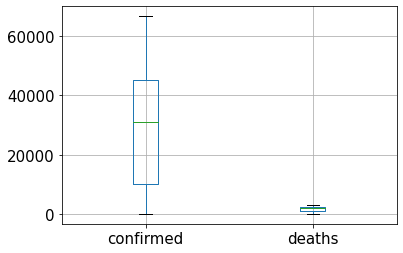

In [38]:
# x = confirmed e y = deaths
boxplot = covid19_manaus.boxplot(column=['confirmed','deaths'],fontsize=15)

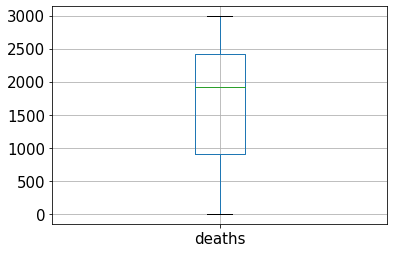

In [39]:
# x = deaths
boxplot_death = covid19_manaus.boxplot(column=['deaths'],fontsize=15)

<h3>4.2 - Bar Plot</h3>

<h4>I - Casos confirmados</h4>

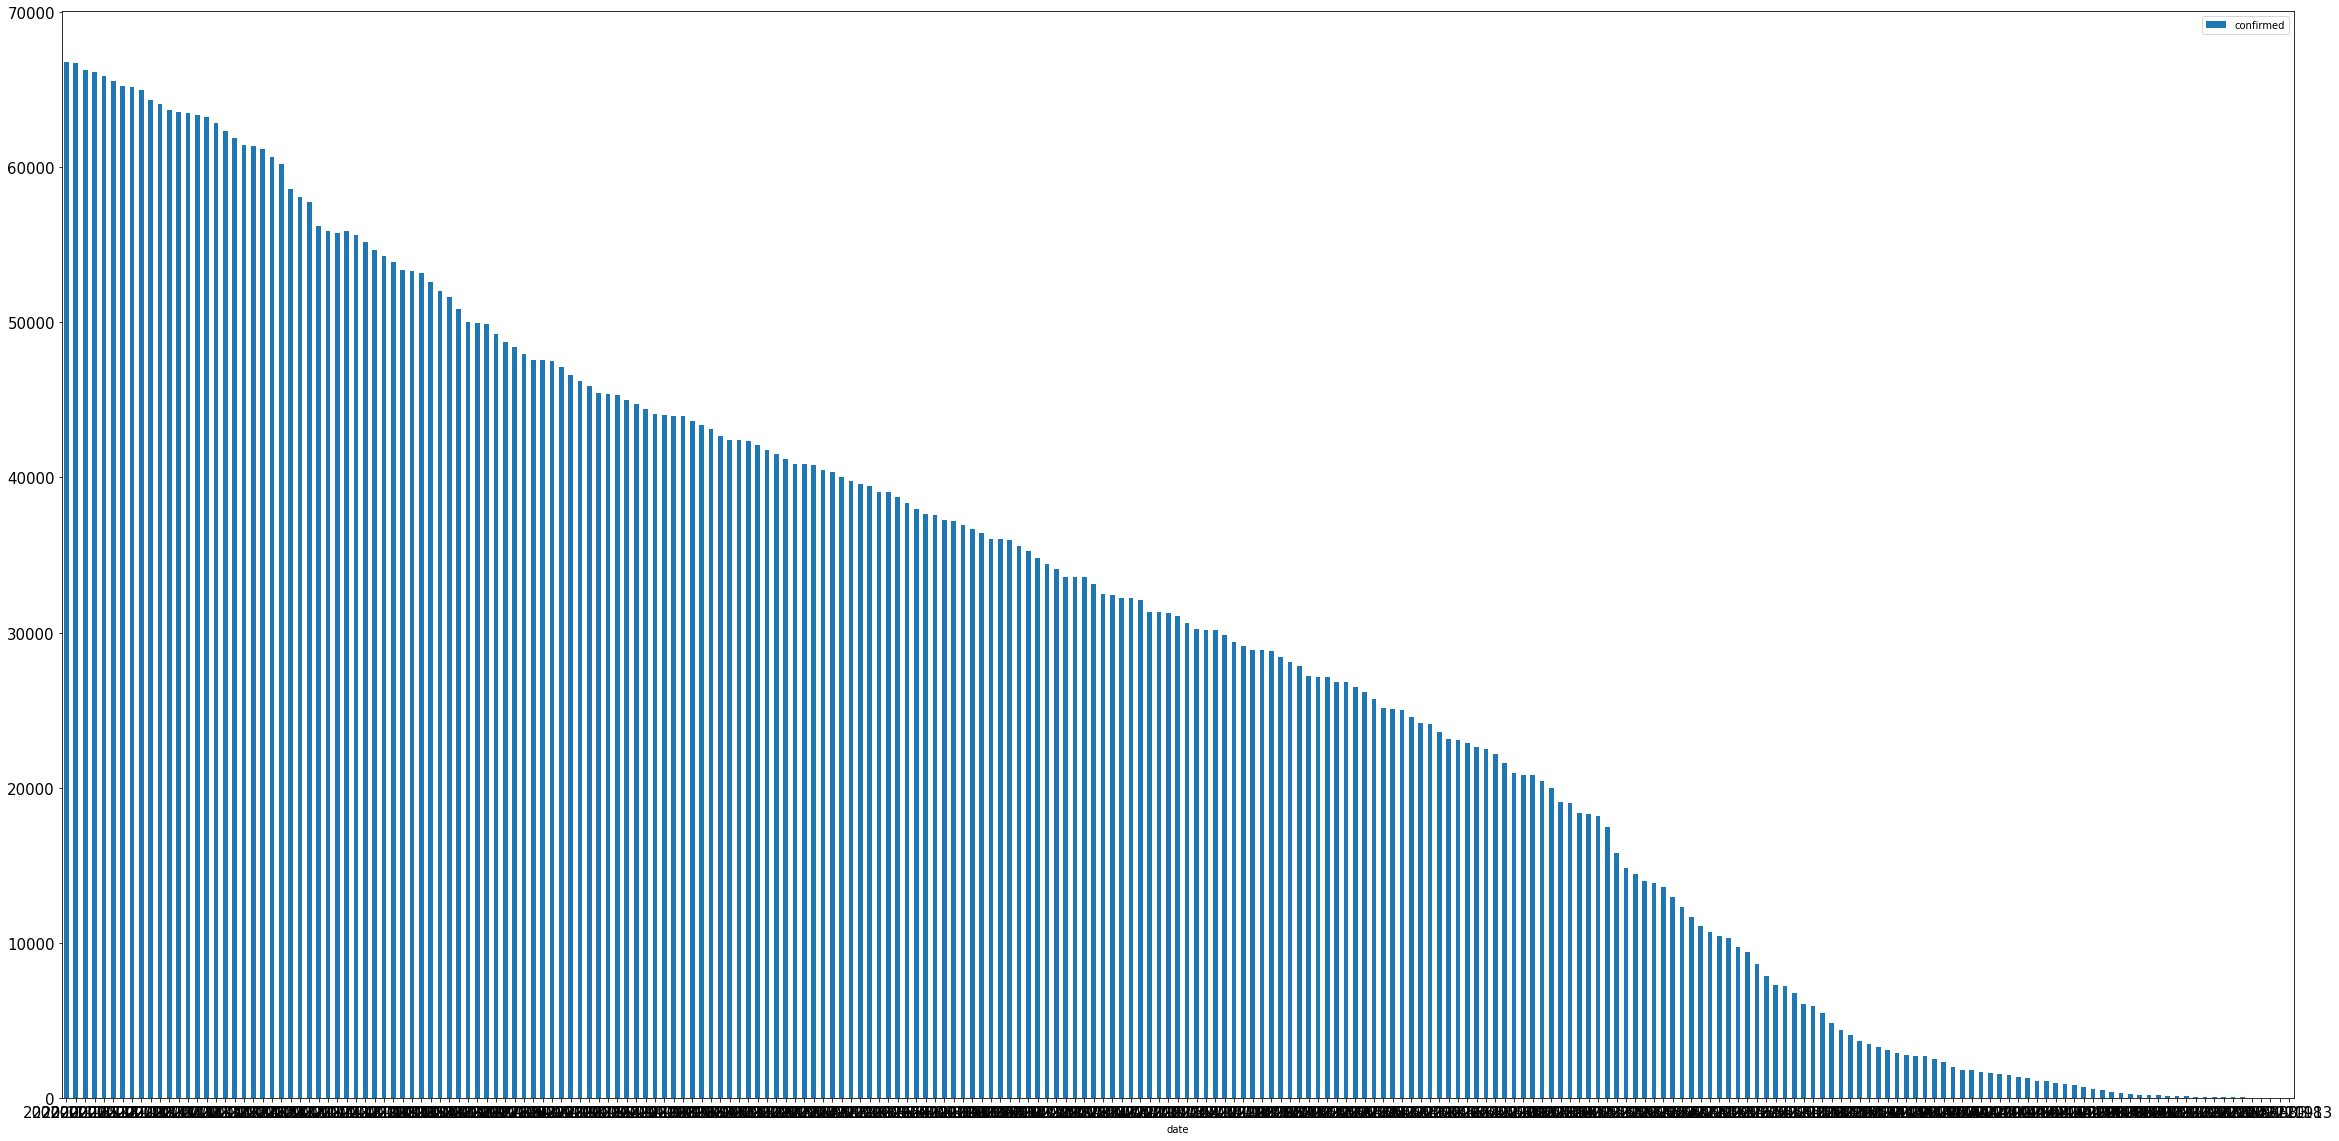

In [43]:
ax_confirmed = covid19_manaus.plot.bar(y='confirmed', x='date', legend='Nº Covid 19 em Manaus',rot=0, fontsize=15, figsize=[40,20])
ax_confirmed

<h4>II - Casos mortes</h4>

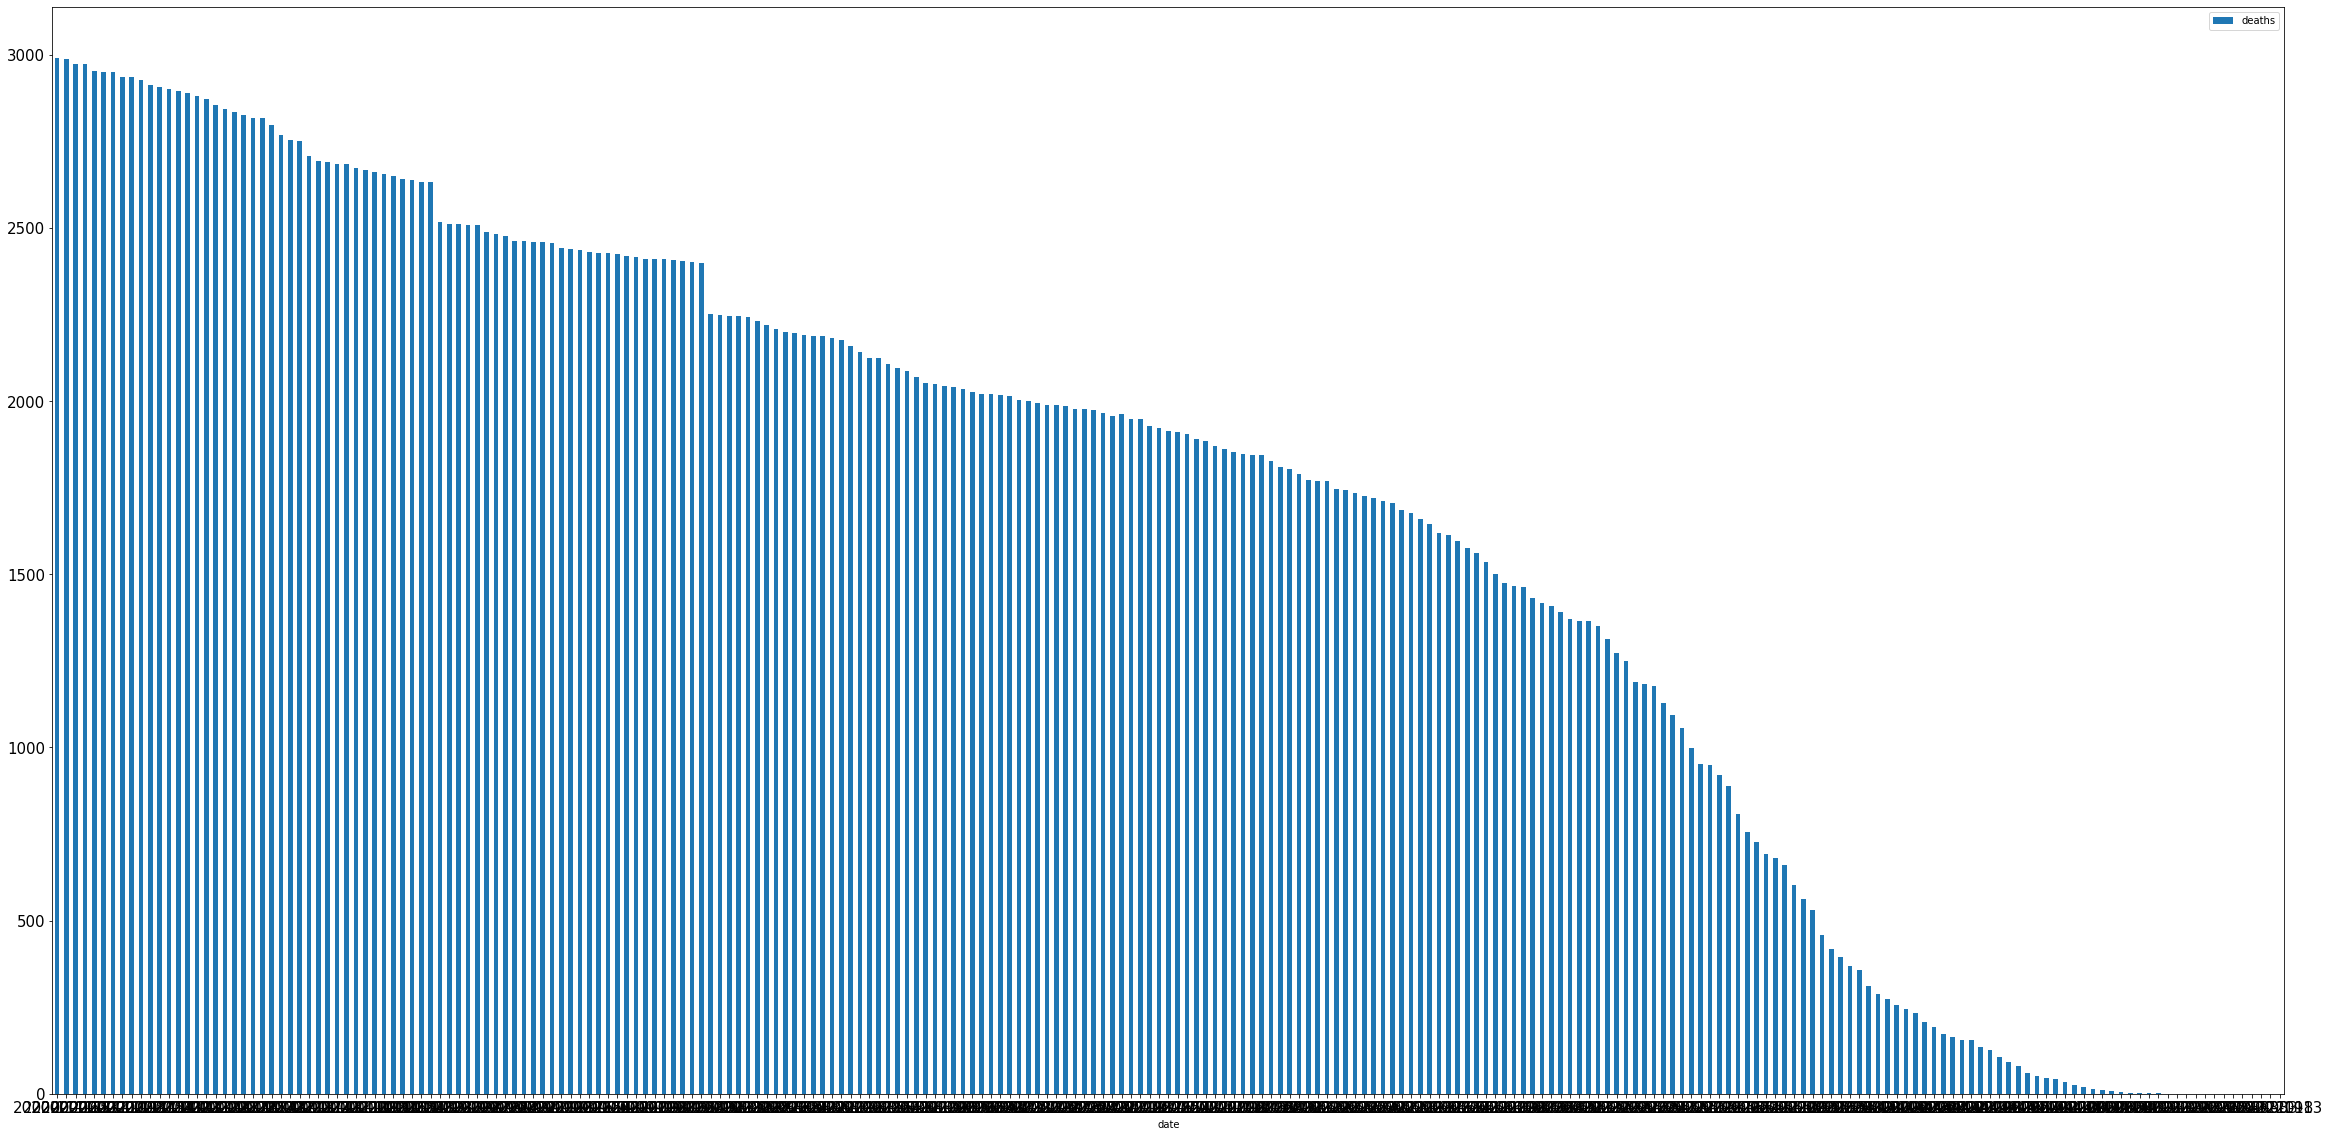

In [44]:
ax_deaths = covid19_manaus.plot.bar(y='deaths', x='date', legend='Nº Covid 19 em Manaus',rot=0, fontsize=15, figsize=[40,20])
ax_deaths